# Explainable AI for Post-COVID Psychological Profile Prediction
## CS 198 Implementation

This version was based on the Kaggle notebook by Amujoyegbe (2023).

https://www.kaggle.com/code/feyiamujo/depression-stress-and-anxiety-prediction

In [1]:
# -------------------------------------
# Library configuration
# -------------------------------------

# Standard libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import re

In [2]:
# Lucky number
random_state = 8

# We follow this guide for proper EDA
# https://www.analyticsvidhya.com/blog/2021/08/exploratory-data-analysis-and-visualization-techniques-in-data-science/

In [20]:
# Loading dataset
df = pd.read_csv('data.csv')

df.head(10)

,SAMPLEID,ANSWERDATE,5_SEX,5_AGE,5_PREFECTURE,5_MARRIED,5_CHILD,5_HINCOME,5_PINCOME,5_JOB,...,5_AUDIT_group,6_K6_total,6_PHQ9_total,6_GAD7_total,6_SSS8_total,6_PTGI-X(Q7_22_27),6_SHS_total,6_UCLA_total,6_LSNS6_total,6_AUDIT
0,1106,2022/05/13-19:39:52,1.0,67.0,14.0,2.0,2.0,3.0,1.0,12.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1759,2022/05/14-08:44:24,1.0,57.0,40.0,2.0,2.0,5.0,3.0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1916,2022/05/13-20:19:11,1.0,62.0,11.0,2.0,2.0,2.0,2.0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3793,2022/05/14-18:23:23,1.0,55.0,40.0,2.0,2.0,4.0,3.0,4.0,...,0.0,12.0,15.0,14.0,18.0,19.0,4.0,24.0,4.0,6.0
5,3827,2022/05/14-10:51:50,2.0,58.0,14.0,1.0,1.0,2.0,2.0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5765,2022/05/13-21:00:54,1.0,61.0,12.0,2.0,2.0,10.0,10.0,5.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8488,2022/05/13-21:47:57,2.0,59.0,27.0,2.0,1.0,10.0,1.0,8.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9703,2022/05/14-07:51:04,2.0,68.0,28.0,2.0,2.0,8.0,1.0,8.0,...,0.0,1.0,0.0,0.0,1.0,3.0,4.5,11.0,18.0,0.0
9,10761,2022/05/14-01:32:45,1.0,53.0,27.0,1.0,1.0,2.0,2.0,5.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24050 entries, 0 to 24049
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SAMPLEID                 24050 non-null  int64  
 1   ANSWERDATE               16641 non-null  object 
 2   5_SEX                    16641 non-null  float64
 3   5_AGE                    16641 non-null  float64
 4   5_PREFECTURE             16641 non-null  float64
 5   5_MARRIED                16641 non-null  float64
 6   5_CHILD                  16641 non-null  float64
 7   5_HINCOME                16641 non-null  float64
 8   5_PINCOME                16641 non-null  float64
 9   5_JOB                    16641 non-null  float64
 10  5_STUDENT                16641 non-null  float64
 11  5_Number_fam             16641 non-null  float64
 12  5_SchoolGrade            16641 non-null  float64
 13  5_YearsEnrolled          16641 non-null  float64
 14  5_VacNum              

In [22]:
# Display summary statistics
df.describe()

,SAMPLEID,5_SEX,5_AGE,5_PREFECTURE,5_MARRIED,5_CHILD,5_HINCOME,5_PINCOME,5_JOB,5_STUDENT,...,5_AUDIT_group,6_K6_total,6_PHQ9_total,6_GAD7_total,6_SSS8_total,6_PTGI-X(Q7_22_27),6_SHS_total,6_UCLA_total,6_LSNS6_total,6_AUDIT
count,2.405000e+04,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,16641.000000,...,16641.0,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000,2659.000000
mean,1.449538e+07,1.457665,50.615648,19.596298,1.646716,1.574545,4.752839,3.377802,6.506400,0.043687,...,0.0,3.510342,3.389996,2.299737,4.696879,11.510718,4.495205,23.464460,8.980820,4.117337
std,9.584566e+06,0.498219,13.374532,8.644244,0.478004,0.494427,2.987438,2.953219,3.227488,0.516160,...,0.0,5.294504,5.453703,4.059662,5.380751,8.563542,1.154314,5.988307,6.241865,5.497362
min,1.106000e+03,1.000000,19.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000
25%,6.243698e+06,1.000000,41.000000,13.000000,1.000000,1.000000,2.000000,1.000000,4.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,1.000000,2.000000,4.000000,20.000000,4.000000,0.000000
50%,1.415849e+07,1.000000,51.000000,14.000000,2.000000,2.000000,4.000000,2.000000,6.000000,0.000000,...,0.0,1.000000,1.000000,0.000000,3.000000,13.000000,4.500000,24.000000,9.000000,2.000000
75%,2.366587e+07,2.000000,60.000000,27.000000,2.000000,2.000000,6.000000,4.000000,9.000000,0.000000,...,0.0,5.000000,4.000000,3.000000,7.000000,18.000000,5.250000,26.000000,13.000000,6.000000
max,3.009518e+07,2.000000,99.000000,47.000000,2.000000,2.000000,10.000000,10.000000,12.000000,8.000000,...,0.0,24.000000,27.000000,21.000000,32.000000,36.000000,7.000000,40.000000,30.000000,38.000000


In [23]:
# Check for missing values
df.isnull().sum()

SAMPLEID                  0
ANSWERDATE             7409
5_SEX                  7409
5_AGE                  7409
5_PREFECTURE           7409
                      ...  
6_PTGI-X(Q7_22_27)    21391
6_SHS_total           21391
6_UCLA_total          21391
6_LSNS6_total         21391
6_AUDIT               21391
Length: 99, dtype: int64

In [24]:
# Check for duplicates on each row.
df.duplicated().value_counts()

False    24050
Name: count, dtype: int64

In [25]:
# Check for unique values.
df.nunique()

SAMPLEID              24050
ANSWERDATE            14027
5_SEX                     2
5_AGE                    74
5_PREFECTURE             46
                      ...  
6_PTGI-X(Q7_22_27)       36
6_SHS_total              25
6_UCLA_total             31
6_LSNS6_total            31
6_AUDIT                  36
Length: 99, dtype: int64

In [26]:
columns  = df.columns
print('Attributes',columns)

Attributes Index(['SAMPLEID', 'ANSWERDATE', '5_SEX', '5_AGE', '5_PREFECTURE', '5_MARRIED',
       '5_CHILD', '5_HINCOME', '5_PINCOME', '5_JOB', '5_STUDENT',
       '5_Number_fam', '5_SchoolGrade', '5_YearsEnrolled', '5_VacNum',
       '5_UkraineMoviePicture', '5_UkraineReadListen', '5_Med_self',
       '5_Medself_covid', '5_Med_fam', '5_Medfam_covid', '5_Current_physical',
       '5_Past_physical', '5_Current_mental', '5_Past_mental',
       '5_Current_covid19', '5_Past_covid19', '5_K6_total', '5_PHQ9_total',
       '5_GAD7_total', '5_SSS8_total', '5_PTGI-X(Q7_39_44)', '5_MAIA_1',
       '5_MAIA_2', '5_MAIA_3', '5_MAIA_4', '5_MAIA_5', '5_MAIA_6', '5_MAIA_7',
       '5_MAIA_8', '5_SHS_total', '5_UCLA_total', '5_LSNS6_total', '5_AUDIT',
       '5_Exercise', '5_HealthyDiet', '5_FavoriteActivity',
       '5_Interaction_offline', '5_Interaction_online', '5_PB_Continuous',
       '5_PB_Altruistic', '5_PB_Avoidant', '5_Trust_gov', '5_Trust_SM',
       '5_Vaccination_will', '5_PB_understanding

In [27]:
for column in columns:
    print(column)

SAMPLEID
ANSWERDATE
5_SEX
5_AGE
5_PREFECTURE
5_MARRIED
5_CHILD
5_HINCOME
5_PINCOME
5_JOB
5_STUDENT
5_Number_fam
5_SchoolGrade
5_YearsEnrolled
5_VacNum
5_UkraineMoviePicture
5_UkraineReadListen
5_Med_self
5_Medself_covid
5_Med_fam
5_Medfam_covid
5_Current_physical
5_Past_physical
5_Current_mental
5_Past_mental
5_Current_covid19
5_Past_covid19
5_K6_total
5_PHQ9_total
5_GAD7_total
5_SSS8_total
5_PTGI-X(Q7_39_44)
5_MAIA_1
5_MAIA_2
5_MAIA_3
5_MAIA_4
5_MAIA_5
5_MAIA_6
5_MAIA_7
5_MAIA_8
5_SHS_total
5_UCLA_total
5_LSNS6_total
5_AUDIT
5_Exercise
5_HealthyDiet
5_FavoriteActivity
5_Interaction_offline
5_Interaction_online
5_PB_Continuous
5_PB_Altruistic
5_PB_Avoidant
5_Trust_gov
5_Trust_SM
5_Vaccination_will
5_PB_understanding
5_Optimism
5_HealthySleep
5_DeteriorationEconomy
5_DeteriorationInteract
5_Frustration
5_CovidAnxiety
5_CovidSleepless
5_DifficultyLiving
5_DifficultyWork
5_PTG1_S22
5_PTG2_S23
5_PTG3_S24
5_PTG4_S25
5_PTG5_S_26
5_PTG6_S27
5_Interest_Ukraine
5_Support_Ukraine
5_Support_Russi

In [28]:
# Sorting dataset based on SAMPLEID
df.sort_values(by=['SAMPLEID'])

,SAMPLEID,ANSWERDATE,5_SEX,5_AGE,5_PREFECTURE,5_MARRIED,5_CHILD,5_HINCOME,5_PINCOME,5_JOB,...,5_AUDIT_group,6_K6_total,6_PHQ9_total,6_GAD7_total,6_SSS8_total,6_PTGI-X(Q7_22_27),6_SHS_total,6_UCLA_total,6_LSNS6_total,6_AUDIT
0,1106,2022/05/13-19:39:52,1.0,67.0,14.0,2.0,2.0,3.0,1.0,12.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16161,1171,2022/05/13-19:35:52,1.0,59.0,14.0,2.0,2.0,6.0,5.0,3.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16162,1263,2022/05/13-19:44:02,1.0,73.0,14.0,2.0,2.0,2.0,2.0,12.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14191,1346,2022/05/13-19:00:17,1.0,52.0,26.0,2.0,2.0,3.0,3.0,2.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18612,1398,2022/05/13-20:26:45,1.0,52.0,27.0,1.0,1.0,3.0,3.0,6.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17614,30094793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16160,30094932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24049,30095042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20047,30095074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Dropping empty rows from sorted dataset
# This is because the empty rows represent respondents who didnt' answer the 6th survey, hence we exclude them from our dataset
df.dropna()

,SAMPLEID,ANSWERDATE,5_SEX,5_AGE,5_PREFECTURE,5_MARRIED,5_CHILD,5_HINCOME,5_PINCOME,5_JOB,...,5_AUDIT_group,6_K6_total,6_PHQ9_total,6_GAD7_total,6_SSS8_total,6_PTGI-X(Q7_22_27),6_SHS_total,6_UCLA_total,6_LSNS6_total,6_AUDIT
4,3793,2022/05/14-18:23:23,1.0,55.0,40.0,2.0,2.0,4.0,3.0,4.0,...,0.0,12.0,15.0,14.0,18.0,19.0,4.00,24.0,4.0,6.0
8,9703,2022/05/14-07:51:04,2.0,68.0,28.0,2.0,2.0,8.0,1.0,8.0,...,0.0,1.0,0.0,0.0,1.0,3.0,4.50,11.0,18.0,0.0
11,11532,2022/05/14-12:53:15,1.0,50.0,13.0,1.0,1.0,3.0,3.0,3.0,...,0.0,1.0,2.0,0.0,1.0,0.0,4.00,32.0,0.0,0.0
15,15778,2022/05/13-19:09:38,1.0,64.0,27.0,2.0,2.0,5.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,18.0,5.50,21.0,13.0,0.0
19,18713,2022/05/13-22:01:06,1.0,61.0,13.0,2.0,2.0,10.0,10.0,2.0,...,0.0,0.0,2.0,0.0,0.0,15.0,5.25,22.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11204,26475923,2022/05/15-01:24:36,1.0,55.0,27.0,1.0,2.0,2.0,2.0,3.0,...,0.0,12.0,4.0,7.0,13.0,18.0,4.00,25.0,6.0,6.0
11208,26476814,2022/05/13-19:35:37,1.0,53.0,13.0,2.0,2.0,7.0,7.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.00,25.0,0.0,0.0
11209,26476898,2022/05/13-21:36:28,2.0,48.0,40.0,2.0,1.0,5.0,1.0,8.0,...,0.0,13.0,6.0,0.0,5.0,12.0,3.75,26.0,4.0,0.0
11288,26520090,2022/05/13-19:39:54,2.0,31.0,13.0,1.0,1.0,3.0,3.0,3.0,...,0.0,2.0,3.0,2.0,14.0,12.0,4.00,27.0,3.0,0.0


In [30]:
# Gathering columns
column_names = df.columns.tolist()

In [34]:
# Boxplots to visualize outliers
for c in df.columns[1:]:
    df.boxplot(c, by='SAMPLEID', figsize=(7,4), fontsize=14)

## Need to deal with outlier based on model being trained

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
# https://www.turing.com/kb/guide-to-principal-component-analysis
# PCA guide

In [15]:
# Setting attributes
attributes = dataset_cleaned[[
    "5_SEX",
    "5_AGE",
    "5_MARRIED",
    "5_PINCOME",
    "5_JOB",
    "5_STUDENT",
    "5_VacNum",
    "5_Med_fam",
    "5_Medfam_covid",
    "5_Current_physical",
    "5_Current_mental",
    "5_Current_covid19",
    "5_K6_total",
    "5_PHQ9_total",
    "5_GAD7_total",
    "5_SSS8_total",
    "5_PTGI-X(Q7_39_44)",
    "5_SHS_total",
    "5_UCLA_total",
    "5_LSNS6_total",
    "5_AUDIT",
    "5_Exercise",
    "5_HealthyDiet",
    "5_FavoriteActivity",
    "5_Interaction_offline",
    "5_Interaction_online",
    "5_PB_Continuous",
    "5_PB_Altruistic",
    "5_PB_Avoidant",
    "5_Trust_gov",
    "5_Trust_SM",
    "5_Vaccination_will",
    "5_PB_understanding",
    "5_Optimism",
    "5_HealthySleep",
    "5_DeteriorationEconomy",
    "5_DeteriorationInteract",
    "5_Frustration",
    "5_CovidAnxiety",
    "5_CovidSleepless",
    "5_DifficultyLiving",
    "5_DifficultyWork",
]]

num_attributes = len(attributes.columns.tolist())

In [16]:
num_attributes

42

In [17]:
attributes.head(10)

,5_SEX,5_AGE,5_MARRIED,5_PINCOME,5_JOB,5_STUDENT,5_VacNum,5_Med_fam,5_Medfam_covid,5_Current_physical,...,5_PB_understanding,5_Optimism,5_HealthySleep,5_DeteriorationEconomy,5_DeteriorationInteract,5_Frustration,5_CovidAnxiety,5_CovidSleepless,5_DifficultyLiving,5_DifficultyWork
4,1.0,55.0,2.0,3.0,4.0,0.0,2.0,1.0,2.0,2.0,...,5.0,4.0,6.0,5.0,2.0,1.0,2.0,1.0,6.0,1.0
8,2.0,68.0,2.0,1.0,8.0,0.0,3.0,2.0,2.0,2.0,...,7.0,7.0,7.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
11,1.0,50.0,1.0,3.0,3.0,0.0,3.0,2.0,2.0,2.0,...,5.0,4.0,6.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
15,1.0,64.0,2.0,3.0,3.0,0.0,3.0,2.0,2.0,2.0,...,5.0,5.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
19,1.0,61.0,2.0,10.0,2.0,0.0,3.0,2.0,2.0,2.0,...,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
21,1.0,60.0,1.0,3.0,4.0,0.0,3.0,2.0,2.0,1.0,...,7.0,7.0,7.0,5.0,4.0,4.0,4.0,1.0,4.0,4.0
22,1.0,67.0,2.0,2.0,9.0,0.0,3.0,2.0,2.0,2.0,...,6.0,6.0,6.0,4.0,2.0,2.0,5.0,2.0,2.0,2.0
24,1.0,51.0,1.0,3.0,7.0,0.0,2.0,2.0,2.0,2.0,...,6.0,2.0,4.0,5.0,4.0,4.0,4.0,1.0,1.0,5.0
27,1.0,44.0,1.0,3.0,3.0,0.0,3.0,2.0,2.0,2.0,...,7.0,4.0,7.0,1.0,1.0,5.0,6.0,5.0,2.0,1.0
31,1.0,53.0,1.0,4.0,3.0,0.0,3.0,2.0,2.0,2.0,...,7.0,7.0,5.0,3.0,1.0,3.0,5.0,3.0,1.0,2.0


In [19]:
targets.head(10)

,6_K6_total,6_PHQ9_total,6_GAD7_total,6_SSS8_total,6_PTGI-X(Q7_22_27),6_SHS_total,6_UCLA_total,6_LSNS6_total,6_AUDIT
4,12.0,15.0,14.0,18.0,19.0,4.00,24.0,4.0,6.0
8,1.0,0.0,0.0,1.0,3.0,4.50,11.0,18.0,0.0
11,1.0,2.0,0.0,1.0,0.0,4.00,32.0,0.0,0.0
15,0.0,0.0,0.0,0.0,18.0,5.50,21.0,13.0,0.0
19,0.0,2.0,0.0,0.0,15.0,5.25,22.0,18.0,0.0
21,0.0,0.0,0.0,6.0,18.0,3.75,24.0,5.0,5.0
22,0.0,0.0,0.0,5.0,11.0,4.25,23.0,3.0,13.0
24,6.0,8.0,6.0,10.0,9.0,3.25,28.0,6.0,0.0
27,7.0,3.0,2.0,11.0,6.0,4.25,29.0,6.0,0.0
31,0.0,2.0,1.0,10.0,16.0,3.50,28.0,6.0,16.0


## PHQ9 Dataset

In [20]:
# Declaring function for PHQ-9
def condition(x):
    if 0 <= x <= 4:
        return 'Minimal depression'
    elif 5 <= x <= 9:
        return 'Mild'
    elif 10 <= x <= 14:
        return 'Moderate'
    elif 15 <= x <= 19:
        return 'Moderately severe'
    elif 20 <= x <= 27:
        return 'Severe'

In [21]:
target_name = '6_PHQ9_total'

target_column = targets[[target_name]].rename(columns={target_name: 'TARGET'})
attributes.columns = attributes.columns.str.lower().str.replace('^5_', '', regex=True)
dataset = pd.concat([attributes, target_column], axis=1)

dataset.head(10)

,sex,age,married,pincome,job,student,vacnum,med_fam,medfam_covid,current_physical,...,optimism,healthysleep,deteriorationeconomy,deteriorationinteract,frustration,covidanxiety,covidsleepless,difficultyliving,difficultywork,TARGET
4,1.0,55.0,2.0,3.0,4.0,0.0,2.0,1.0,2.0,2.0,...,4.0,6.0,5.0,2.0,1.0,2.0,1.0,6.0,1.0,15.0
8,2.0,68.0,2.0,1.0,8.0,0.0,3.0,2.0,2.0,2.0,...,7.0,7.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0
11,1.0,50.0,1.0,3.0,3.0,0.0,3.0,2.0,2.0,2.0,...,4.0,6.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0
15,1.0,64.0,2.0,3.0,3.0,0.0,3.0,2.0,2.0,2.0,...,5.0,6.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0
19,1.0,61.0,2.0,10.0,2.0,0.0,3.0,2.0,2.0,2.0,...,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0
21,1.0,60.0,1.0,3.0,4.0,0.0,3.0,2.0,2.0,1.0,...,7.0,7.0,5.0,4.0,4.0,4.0,1.0,4.0,4.0,0.0
22,1.0,67.0,2.0,2.0,9.0,0.0,3.0,2.0,2.0,2.0,...,6.0,6.0,4.0,2.0,2.0,5.0,2.0,2.0,2.0,0.0
24,1.0,51.0,1.0,3.0,7.0,0.0,2.0,2.0,2.0,2.0,...,2.0,4.0,5.0,4.0,4.0,4.0,1.0,1.0,5.0,8.0
27,1.0,44.0,1.0,3.0,3.0,0.0,3.0,2.0,2.0,2.0,...,4.0,7.0,1.0,1.0,5.0,6.0,5.0,2.0,1.0,3.0
31,1.0,53.0,1.0,4.0,3.0,0.0,3.0,2.0,2.0,2.0,...,7.0,5.0,3.0,1.0,3.0,5.0,3.0,1.0,2.0,2.0


In [22]:
# Count the frequency of each label
dataset['TARGET'] = dataset['TARGET'].apply(condition)

label_counts = dataset['TARGET'].value_counts()

print(label_counts)

TARGET
Minimal depression    2001
Mild                   353
Moderate               142
Moderately severe       92
Severe                  71
Name: count, dtype: int64


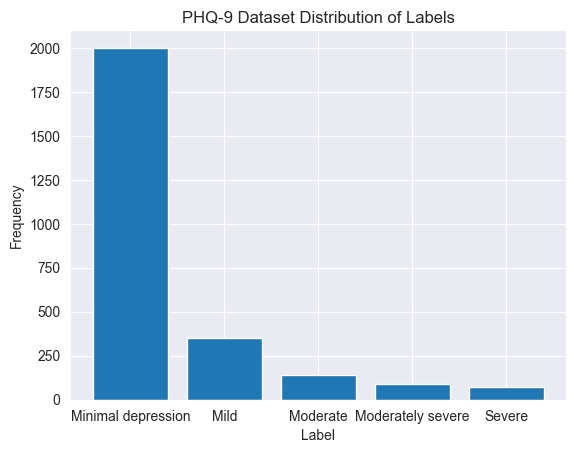

In [23]:
# Plot the bar chart
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('PHQ-9 Dataset Distribution of Labels')

# Show the plot
plt.show()

# Splitting datasets

In [24]:
# -------------------------------------
# Library configuration
# -------------------------------------

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier

In [25]:
# Extract the target and features
y = dataset['TARGET']
X = dataset.drop(columns=['TARGET'])

# Encode the labels
encoder = LabelEncoder()
encoded_label = encoder.fit_transform(y)

# Reflect encoder changes in y
y_encoded = encoder.transform(y)

#Get the training and test set from the K6 dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state= 30)

# Calculate the count of each unique label
unique_labels, label_counts = np.unique(y_test, return_counts=True)

In [26]:
labels = []

print("Test data distribution")
for label, count in zip(unique_labels, label_counts):
    label_name = encoder.inverse_transform([label])[0]
    labels.append(label_name)
    print(f"Label: {label_name}, Count: {count}")

Test data distribution
Label: Mild, Count: 104
Label: Minimal depression, Count: 596
Label: Moderate, Count: 51
Label: Moderately severe, Count: 25
Label: Severe, Count: 22


In [27]:
print(labels)

['Mild', 'Minimal depression', 'Moderate', 'Moderately severe', 'Severe']


# Model Training

In [28]:
import seaborn as sns

In [29]:
model = RandomForestClassifier(random_state=random_state)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [30]:
predictions = model.predict(X_test)

[[ 25  74   1   2   2]
 [ 32 561   0   3   0]
 [ 23  19   2   4   3]
 [  5   6   3   6   5]
 [  6   6   0   4   6]]


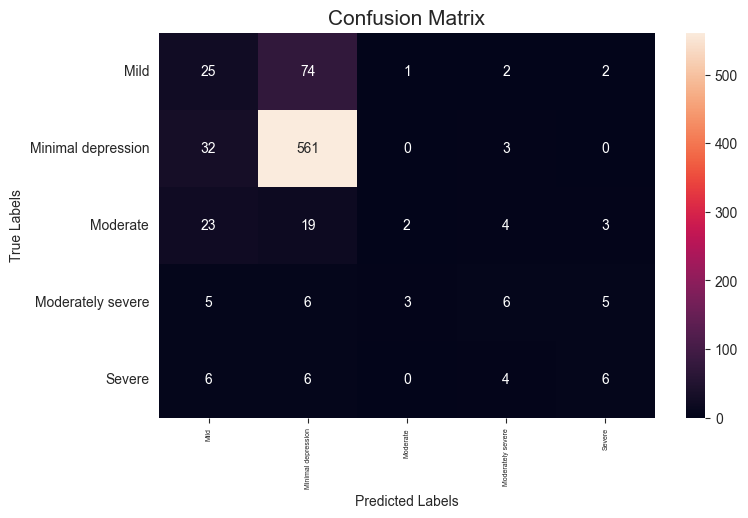

In [31]:
#Confusion matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

#Plot the Confusion matrix graph
fig = plt.figure(figsize=(8, 5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='g')
ax.set_xlabel('Predicted Labels', fontsize=10)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize=5)
ax.xaxis.tick_bottom()

ax.set_ylabel('True Labels', fontsize=10)
ax.yaxis.set_ticklabels(labels, fontsize=10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix', fontsize=15)

plt.show()

In [32]:
#Classification report
print(classification_report(y_test, predictions, target_names = labels))

                    precision    recall  f1-score   support

              Mild       0.27      0.24      0.26       104
Minimal depression       0.84      0.94      0.89       596
          Moderate       0.33      0.04      0.07        51
 Moderately severe       0.32      0.24      0.27        25
            Severe       0.38      0.27      0.32        22

          accuracy                           0.75       798
         macro avg       0.43      0.35      0.36       798
      weighted avg       0.71      0.75      0.72       798



In [33]:
# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='macro')
recall = recall_score(y_test, predictions, average='macro')
f1 = f1_score(y_test, predictions, average='macro')


# Print the evaluation metrics
print("Accuracy: %.f" %(accuracy*100))
print("Precision: %.f" %(precision*100))
print("Recall: %.f" %(recall*100))
print("F1-score: %.f" %(f1*100))

Accuracy: 75
Precision: 43
Recall: 35
F1-score: 36


# Explainer

In [34]:
#!pip install explainerdashboard
#!pip install -U explainerdashboard

In [35]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(model, X_test, y_test, labels=labels)

from explainerdashboard import ExplainerDashboard
db = ExplainerDashboard(explainer,
                        # importances tab
                        importances=True,
                        hide_globalcutoff=True,
                        hide_cutoff=True,
                        
                        # model summary tab
                        model_summary=True,
                        
                        # contributions tab
                        contributions=True,
                        
                        # what if tab
                        whatif=True,
                        
                        # shap dependence tab
                        shap_dependenc=True,
                        
                        # tabs turned off
                        shap_interaction=False,
                        decision_trees=False)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump

In [36]:
db.run()

Starting ExplainerDashboard on http://192.168.254.104:8050


ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=8050): Max retries exceeded with url: /_alive_539b48d3-f4f3-42d4-b0ef-3e8d1315a06c (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002065879D750>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))